# Mostramos el "Hola mundo" del Machine Learnig 
Esta es mi version limpia del projecto de Platzi , con este modelo clasificatorio  vamos a distinguir  tres especies de iris teniendo en cuenta sus caracteristicas fisicas:   
![](https://miro.medium.com/v2/resize:fit:1400/1*7bnLKsChXq94QjtAiRn40w.png)



In [45]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)
# Traemos el set de datos
def dataframe_iris():
    iris_load = load_iris()
    df = pd.DataFrame(iris_load.data, columns=iris_load.feature_names)
    df['species'] = pd.Categorical.from_codes(iris_load.target, iris_load.target_names)
    return df, iris_load

df, iris = dataframe_iris()

# --Hacemos una separación aleatoria de los datos--
def train_randm():
    train_data_ramdon = np.random.rand(len(df)) < 0.8
    training = df[train_data_ramdon]
    test_training = df[~train_data_ramdon]
    return train_data_ramdon, test_training

train, test= train_randm()

#if not any(test_data_ramdon):
#    print("No hay datos en el conjunto de prueba. Ajusta la división aleatoria.")
#else:
    # Hacemos los features de la especie
#    features = df.columns[:4]
features = df.columns[:4]
#-- Definimos el clasificador y el predictor --
def Clasificadores(df, test, train, features):
    
    train_data = df[train]
    y = pd.factorize(train_data['species'])[0]
    clasificador = RandomForestClassifier(n_jobs=3, random_state=0)
    #con .fit sklearn nos permite entrenar el modelo, le decimos que entrne con features y le pasamos el vector especifico
    clasificador.fit(train_data[features], y)
    prediccion = clasificador.predict(test[features])
    mostrar_prediccion = pd.crosstab(test['species'], prediccion, rownames=['Actual Species'], colnames=['Predicted Species'])
    return mostrar_prediccion

matrix_confusion = Clasificadores(df, test, train, features)

matrix_confusion


Predicted Species,0,1,2
Actual Species,,,
setosa,8,0,0
versicolor,0,5,2
virginica,0,0,12


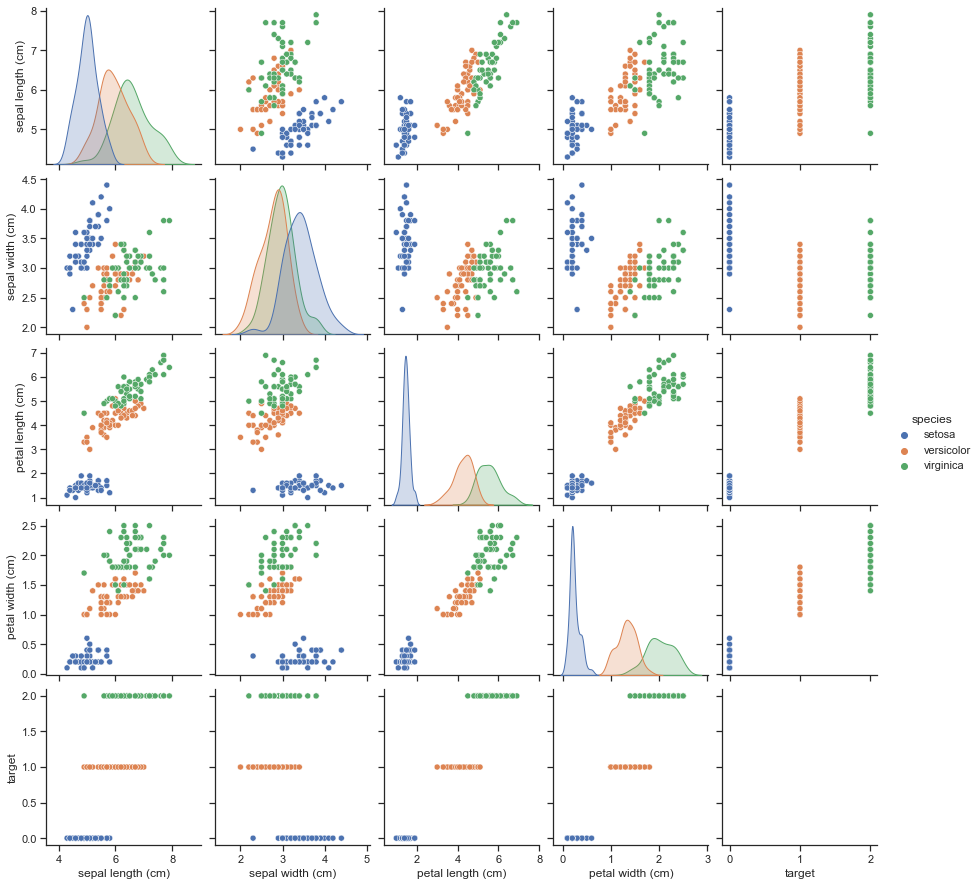

In [44]:
# -- aqui graficacomos las diferentes combinaciones de iris: largo ,anchura del petalos y sepalo  -- 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Crear un DataFrame para los datos
df = pd.DataFrame(data, columns=feature_names)
df['target'] = target
df['species'] = [target_names[i] for i in target]

# Visualización con Seaborn
sns.set(style="ticks")
sns.pairplot(df, hue="species")
plt.show()
